In [1]:
from utils import *
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
imgs_4k = get_folder(callback=clear_output)
imgs_1080bc = get_folder(folder='./images/1080P/bicubic/', callback=clear_output)
imgs_720bc = get_folder(folder='./images/720P/bicubic/', callback=clear_output)

199 / 200


## DCT Explore

(2160, 3840)


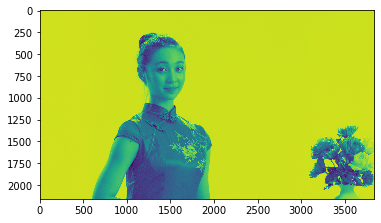

In [3]:
img = np.float32(imgs_4k[10, :, :, 0])
print(img.shape)
plt.imshow(img)

(2160, 3840)


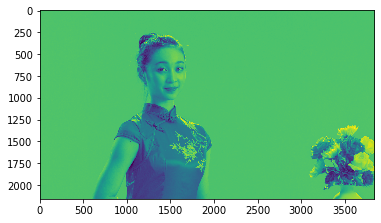

In [4]:
img = np.float32(imgs_4k[10, :, :, 1])
print(img.shape)
plt.imshow(img)

(2160, 3840)


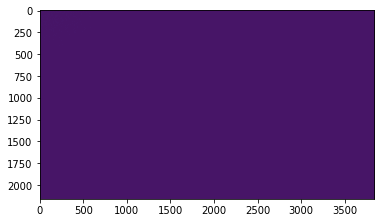

In [5]:
img_dct = cv2.dct(img)
print(img_dct.shape)
plt.imshow(img_dct)

In [6]:
def vis_hist(img, thresholds = (100, 1000, 10000), level=None, display=True):
    tmp = img.flatten()

    if thresholds is None:
        hst = plt.hist(tmp, bins=100)[0]
    else:
        num_plots = len(thresholds) + 1
        
        plt.figure(figsize=[12, 4 * ((num_plots + 1) // 2)])
        hsts = []
        
        for idx in range(num_plots):
            if level == idx:
                break
            plt.subplot((num_plots + 1) // 2, 2, idx + 1)
            if idx == 0:
                hst = plt.hist(tmp[abs(tmp) < thresholds[0]], bins=100)[0]
            elif idx == num_plots - 1:
                hst = plt.hist(tmp[abs(tmp) >= thresholds[idx - 1]], bins=100)[0]
            else:
                hst = plt.hist(tmp[(abs(tmp) >= thresholds[idx - 1]) & (abs(tmp) < thresholds[idx])], bins=100)
    if display:
        plt.show()

SyntaxError: invalid syntax (<ipython-input-6-4d6b4a9693c2>, line 21)

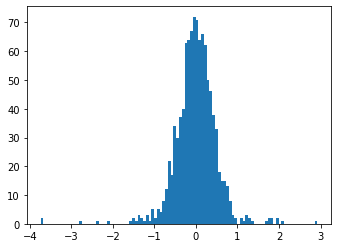

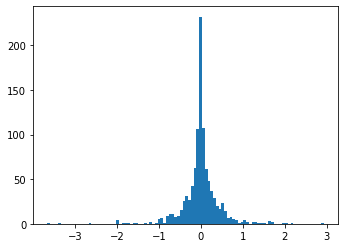

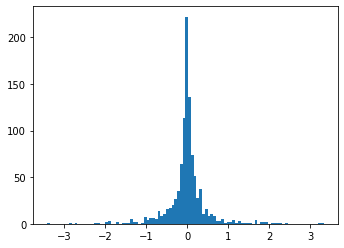

In [88]:
tile = 32
vis_hist(cv2.dct(np.float32(imgs_4k[10, :tile, :tile, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_1080bc[10, :tile, :tile, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_720bc[10, :tile, :tile, 0])), (10,), 1)

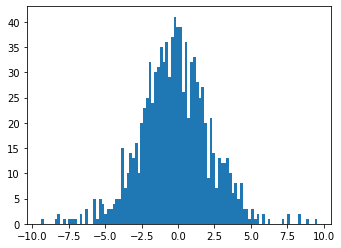

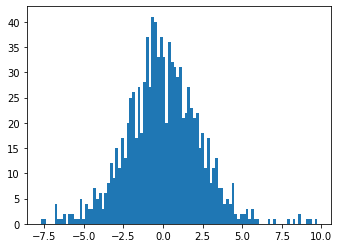

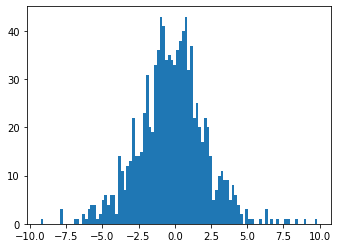

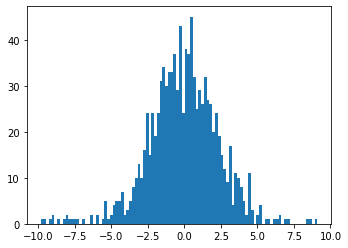

In [76]:
tile = 32
vis_hist(cv2.dct(np.float32(imgs_4k[0, tile*0:tile*1, tile*0:tile*1, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_4k[0, tile*1:tile*2, tile*1:tile*2, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_4k[0, tile*0:tile*1, tile*1:tile*2, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_4k[0, tile*1:tile*2, tile*0:tile*1, 0])), (10,), 1)

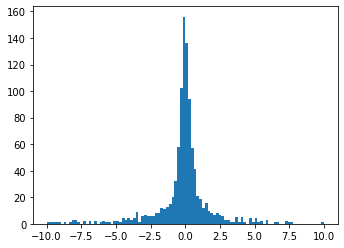

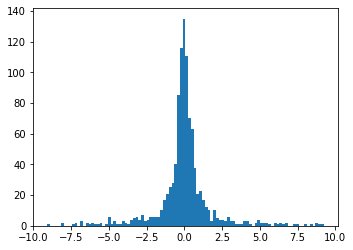

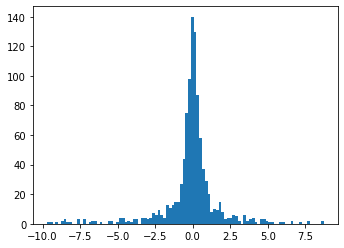

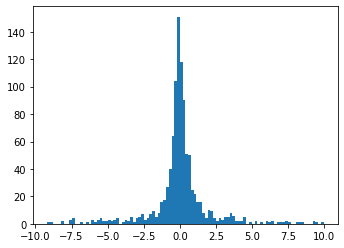

In [77]:
tile = 32
vis_hist(cv2.dct(np.float32(imgs_1080bc[0, tile*0:tile*1, tile*0:tile*1, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_1080bc[0, tile*1:tile*2, tile*1:tile*2, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_1080bc[0, tile*0:tile*1, tile*1:tile*2, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_1080bc[0, tile*1:tile*2, tile*0:tile*1, 0])), (10,), 1)

In [7]:
from DCT_Judger import *

In [11]:
dct_hist_union(imgs_4k[0, :, :, 0], 64)
plt.show()

KeyboardInterrupt: 

In [33]:
def vis_hist_all_tile(img, tile, n=10, bins=25, threshold=10, channel=0):
    plt.figure(figsize=(36, 24))
    n = min(img.shape[0] // tile, img.shape[1] // tile, n)
    stds = []
    for i in range(n):
        for j in range(n):
            plt.subplot(n, n, i*n+j+1)
            if len(img.shape) < 3:
                dct = cv2.dct(np.float32(img[tile*i:tile*(i+1), tile*j:tile*(j+1)])).flatten()
            else:
                dct = cv2.dct(np.float32(img[tile*i:tile*(i+1), tile*j:tile*(j+1), channel])).flatten()
            dct = dct[abs(dct) < threshold]
            stds.append(np.std(dct))
            plt.hist(dct, bins=bins)
    return stds

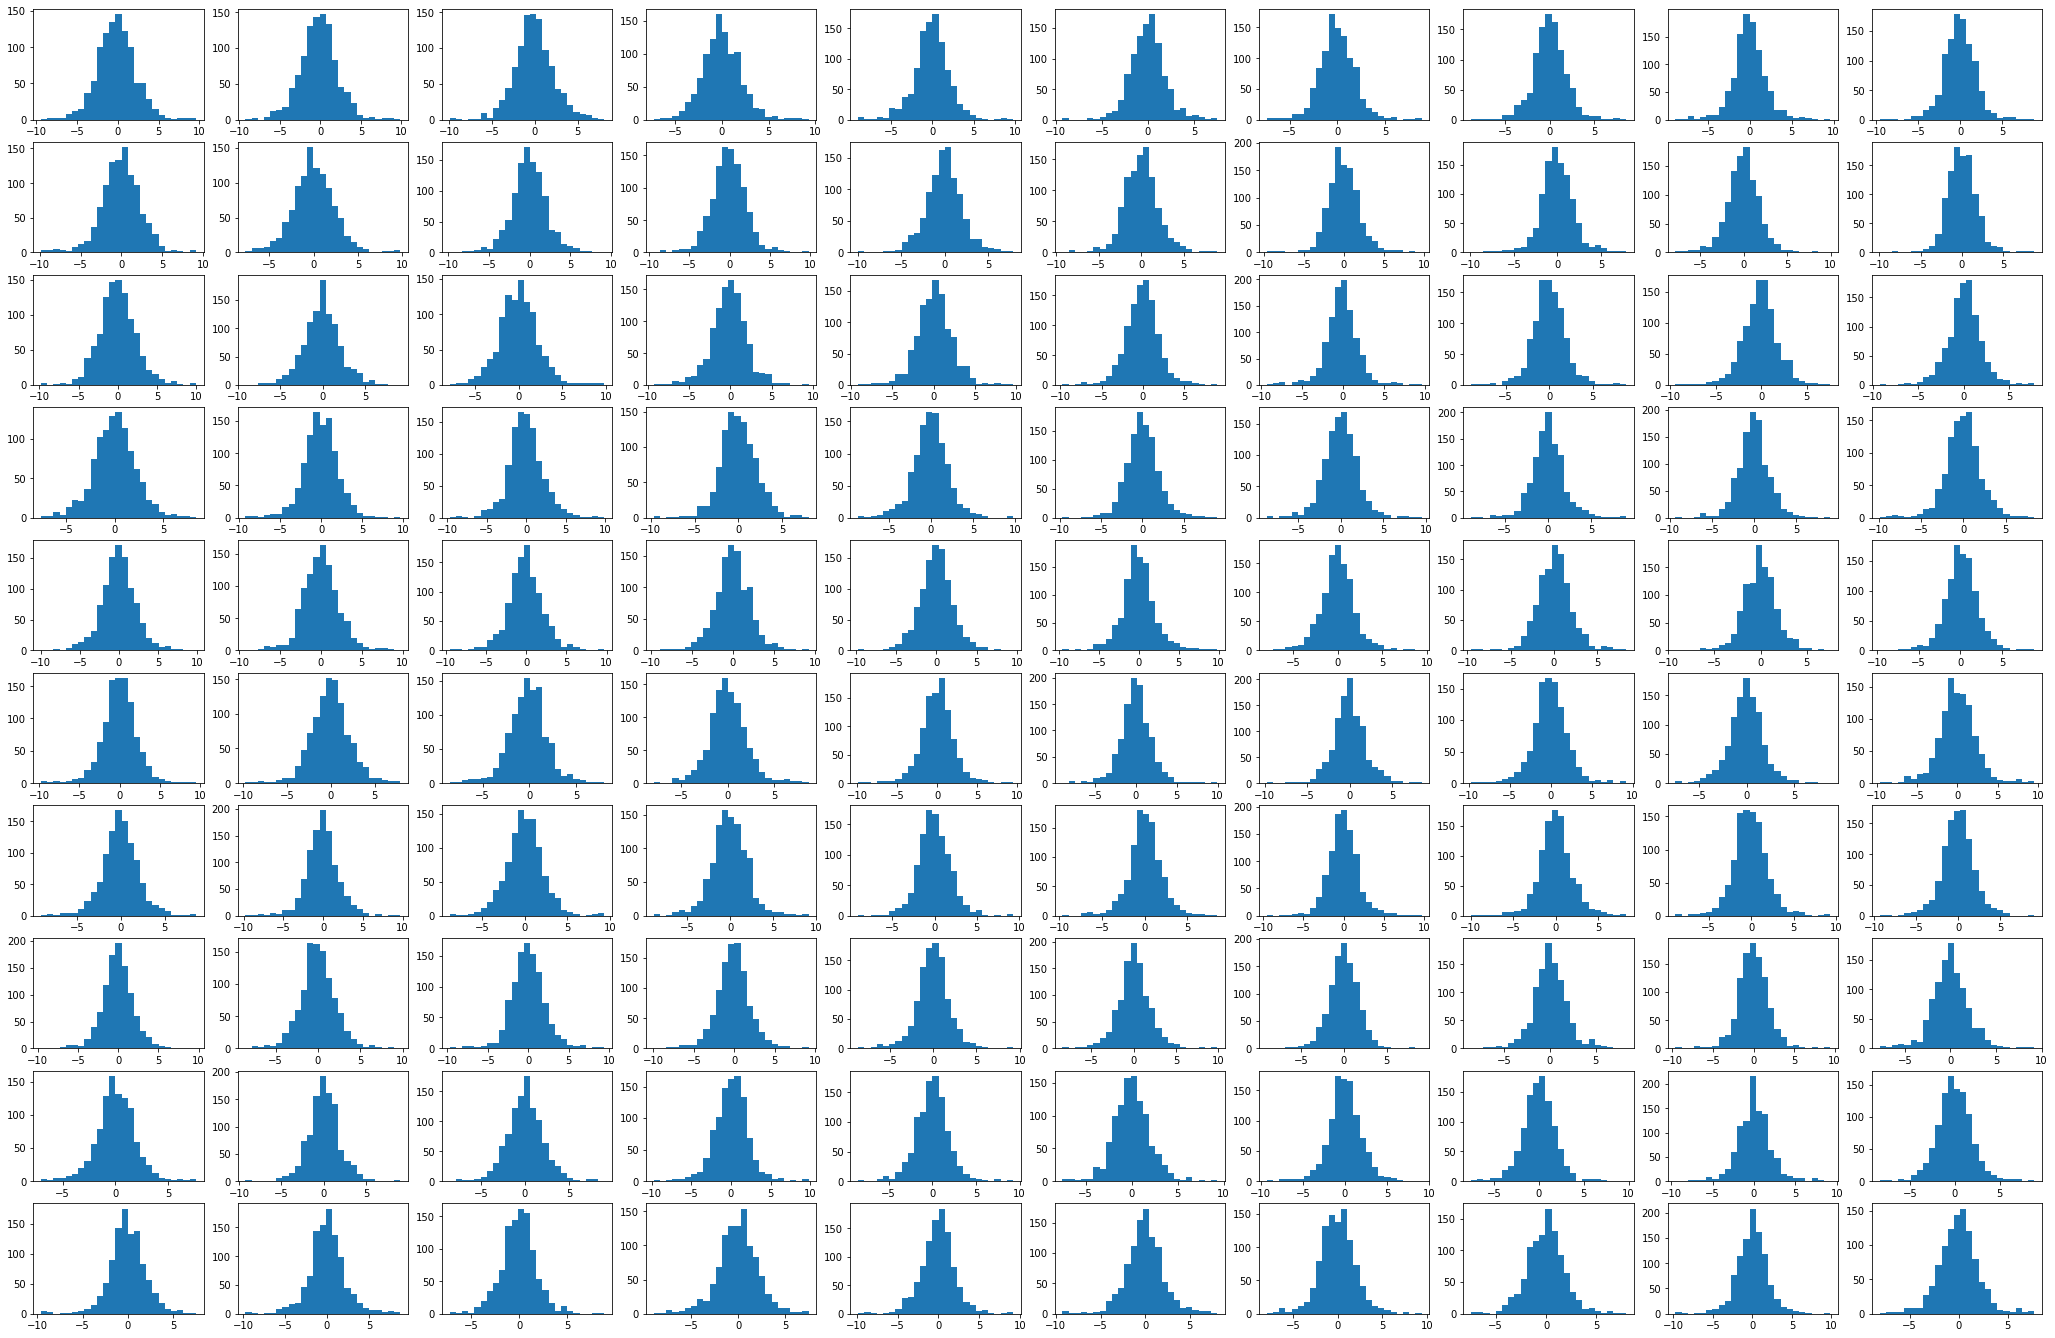

(array([ 3.,  8., 15., 17., 14., 18., 11.,  7.,  2.,  5.]),
 array([1.7915257, 1.8527681, 1.9140104, 1.9752527, 2.0364952, 2.0977376,
        2.15898  , 2.2202222, 2.2814646, 2.342707 , 2.4039493],
       dtype=float32),
 <a list of 10 Patch objects>)

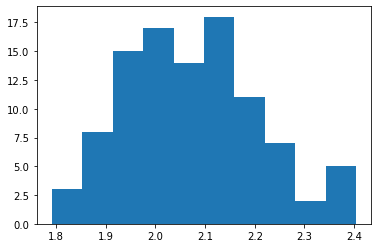

In [34]:
stds = vis_hist_all_tile(imgs_4k[0, :, :, 0], 32)
plt.show()
plt.figure()
plt.hist(stds)

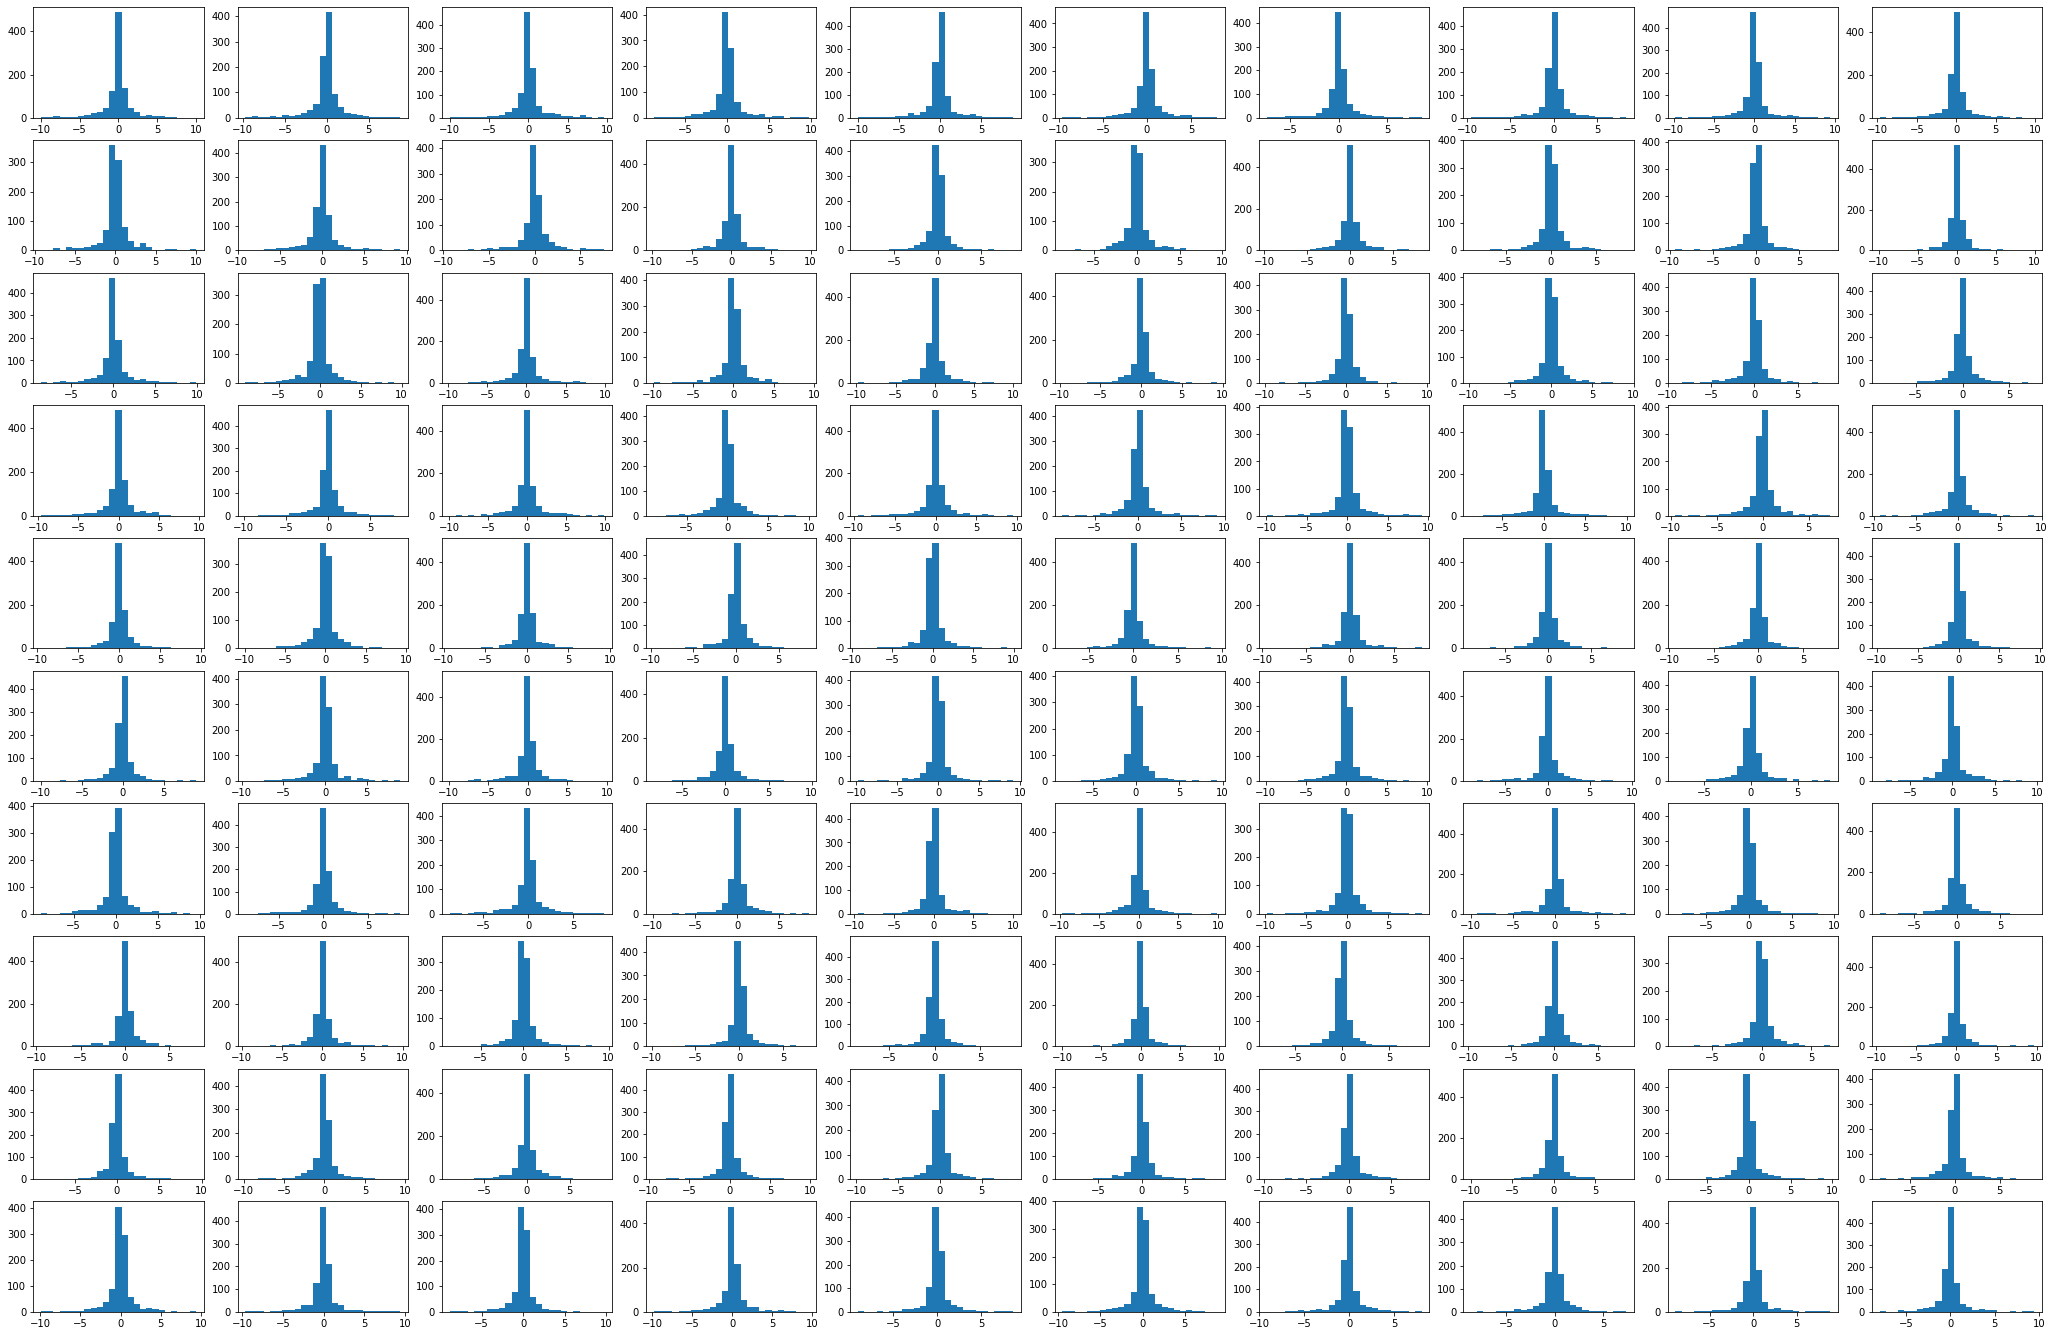

(array([ 8., 12., 17., 20., 15., 11.,  9.,  3.,  3.,  2.]),
 array([1.364843 , 1.427924 , 1.4910051, 1.5540861, 1.6171671, 1.680248 ,
        1.743329 , 1.8064101, 1.8694911, 1.9325721, 1.9956532],
       dtype=float32),
 <a list of 10 Patch objects>)

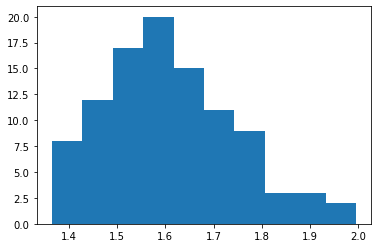

In [35]:
stds = vis_hist_all_tile(imgs_1080bc[0, :, :, 0], 32)
plt.show()
plt.figure()
plt.hist(stds)

## With Reference

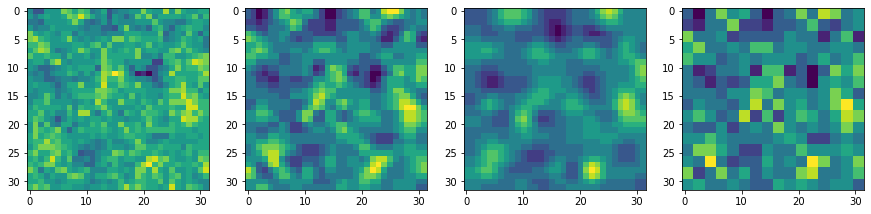

In [263]:
idx = 30

img_4k = imgs_4k[idx, :, :, 0]
img_1080bc = imgs_1080bc[idx, :, :, 0]
img_720bc = imgs_720bc[idx, :, :, 0]
img_ref = cv2.resize(down_sample(img_4k, 2), None, fx=2, fy=2, interpolation=cv2.INTER_AREA)

tile = 32
tile_4k = img_4k[:tile, :tile]
tile_1080bc = img_1080bc[:tile, :tile]
tile_720bc = img_720bc[:tile, :tile]
tile_ref = img_ref[:tile, :tile]

plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
plt.imshow(tile_4k)
plt.subplot(1, 4, 2)
plt.imshow(tile_1080bc)
plt.subplot(1, 4, 3)
plt.imshow(tile_720bc)
plt.subplot(1, 4, 4)
plt.imshow(tile_ref)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


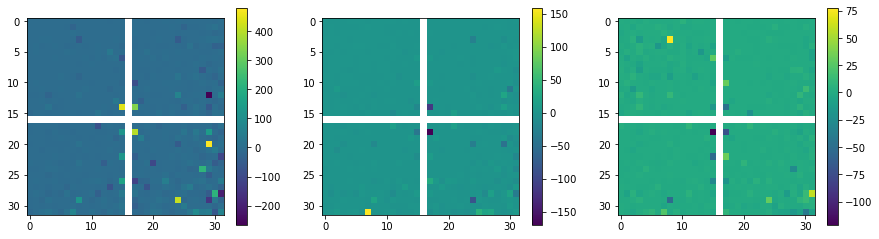

In [130]:
dct_ref = cv2.dct(np.float32(tile_ref))
dct_4k_rel = cv2.dct(np.float32(tile_4k)) / dct_ref
dct_1080bc_rel = cv2.dct(np.float32(tile_1080bc)) / dct_ref
dct_720bc_rel = cv2.dct(np.float32(tile_720bc)) / dct_ref
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(dct_4k_rel)
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(dct_1080bc_rel)
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(dct_720bc_rel)
plt.colorbar()

(array([  1.,   3.,   3.,   7.,   2.,   8.,  12.,  14.,  11.,  24.,  89.,
        487., 134.,  53.,  23.,  15.,  11.,   9.,   8.,   5.,   2.,   0.,
          2.,   3.,   3.]),
 array([-8.114794  , -7.4140315 , -6.7132688 , -6.0125065 , -5.311744  ,
        -4.610982  , -3.9102194 , -3.209457  , -2.5086946 , -1.8079321 ,
        -1.1071697 , -0.40640733,  0.2943551 ,  0.9951175 ,  1.6958799 ,
         2.3966422 ,  3.0974047 ,  3.7981672 ,  4.4989295 ,  5.199692  ,
         5.9004545 ,  6.601217  ,  7.301979  ,  8.002742  ,  8.703504  ,
         9.404266  ], dtype=float32),
 <a list of 25 Patch objects>)

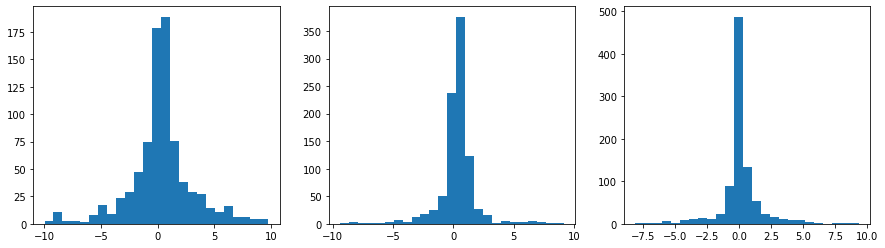

In [131]:
threshold = 10

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
tmp = dct_4k_rel.flatten()
plt.hist(tmp[abs(tmp) < threshold], bins=25)
plt.subplot(1, 3, 2)
tmp = dct_1080bc_rel.flatten()
plt.hist(tmp[abs(tmp) < threshold], bins=25)
plt.subplot(1, 3, 3)
tmp = dct_720bc_rel.flatten()
plt.hist(tmp[abs(tmp) < threshold], bins=25)

### Self Reference

In [268]:
def dct_tile(img, i, j, tile, channel=0, rate=2, hist=False, threshold=20, bins=20, divide_ref=True):
    img = np.float32(img)
    if len(img.shape) < 3:
        img_tile = img[i*tile:(i+1)*tile, j*tile:(j+1)*tile]
    else:
        img_tile = img[i*tile:(i+1)*tile, j*tile:(j+1)*tile, channel]
    img_ref = cv2.resize(down_sample(img_tile, rate), dsize=img_tile.shape, interpolation=cv2.INTER_AREA)
    if divide_ref:
        tmp = cv2.dct(img_tile) / cv2.dct(img_ref)
    else:
        tmp = (cv2.dct(img_tile), cv2.dct(img_ref))
#     if hist:
    if threshold is not None:
        tmp = tmp.flatten()
        tmp = tmp[abs(tmp) < threshold]
#         hst, _ = np.histogram(tmp, bins=bins, range=(-threshold, threshold))
#         return hst
#     else:
    return tmp

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


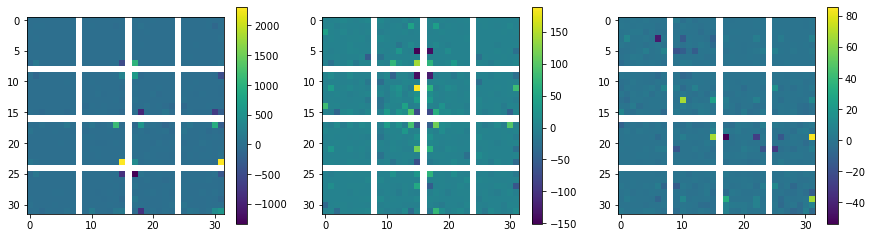

In [181]:
rate = 4

dct_4k_sref = dct_tile(img_4k, 0, 0, 32, rate=rate)
dct_1080bc_sref = dct_tile(img_1080bc, 0, 0, 32, rate=rate)
dct_720bc_sref = dct_tile(img_720bc, 0, 0, 32, rate=rate)

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(dct_4k_sref)
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(dct_1080bc_sref)
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(dct_720bc_sref)
plt.colorbar()

-0.18871869 5.386423 5.38972815088157
0.28020254 3.9023333 3.9123798339720284
-0.0040887864 2.5630214 2.5630246067361715


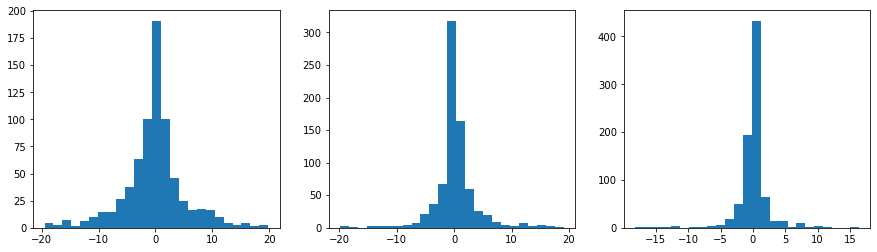

In [234]:
threshold = 20

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
tmp = dct_4k_sref.flatten()
tmp = tmp[abs(tmp) < threshold]
plt.hist(tmp, bins=25)[0]
print(tmp.mean(), tmp.std(), (tmp**2).mean()**0.5)
plt.subplot(1, 3, 2)
tmp = dct_1080bc_sref.flatten()
tmp = tmp[abs(tmp) < threshold]
hst = plt.hist(tmp, bins=25)[0]
print(tmp.mean(), tmp.std(), (tmp**2).mean()**0.5)
plt.subplot(1, 3, 3)
tmp = dct_720bc_sref.flatten()
tmp = tmp[abs(tmp) < threshold]
hst = plt.hist(tmp, bins=25)[0]
print(tmp.mean(), tmp.std(), (tmp**2).mean()**0.5)

In [238]:
def self_ref_dct(img, tile, channel=0, rate=2, threshold=20, bins=20):
    if len(img.shape) > 3:
        img = img[:, :, channel]
    nx = img.shape[0] // tile
    ny = img.shape[1] // tile
#     hsts = []
    dcts = []
    for i in range(nx - 1):
        for j in range(ny - 1):
#             hst = self_ref_dct_tile(img[:, :], i, j, tile, rate=rate, hist=True, threshold=threshold, bins=bins)
            dct = dct_tile(img[:, :], i, j, tile, rate=rate, threshold=threshold)
            dcts.append(dct)
#     return np.array(hsts)
    return np.array(dcts)

### Mistakenly Calculate Features using Histogram

In [187]:
print('4k')
dct_4k_hst_com = self_ref_dct(img_4k, 32)
print('1080bc')
dct_1080bc_hst_com = self_ref_dct(img_1080bc, 32)
print('720bc')
dct_720bc_hst_com = self_ref_dct(img_720bc, 32)

4k


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


1080bc
720bc


(array([5.400e+01, 6.170e+02, 2.164e+03, 2.699e+03, 1.701e+03, 4.840e+02,
        1.080e+02, 2.000e+01, 5.000e+00, 2.000e+00]),
 array([278. , 297.7, 317.4, 337.1, 356.8, 376.5, 396.2, 415.9, 435.6,
        455.3, 475. ]),
 <a list of 10 Patch objects>)

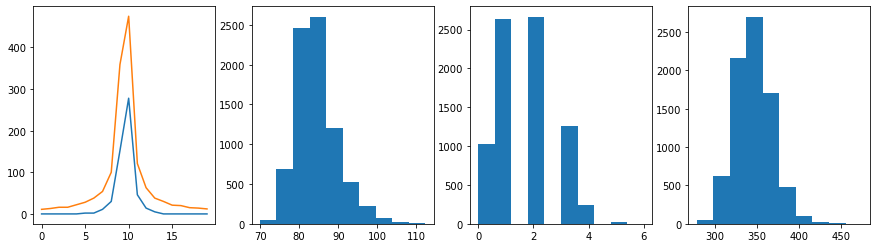

In [225]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
# plt.hist(abs(dct_4k_hst_com).mean(axis=1))
plt.plot(dct_4k_hst_com.min(axis=0))
plt.plot(dct_4k_hst_com.max(axis=0))
plt.subplot(1, 4, 2)
plt.hist(dct_4k_hst_com.std(axis=1))
plt.subplot(1, 4, 3)
plt.hist(abs(dct_4k_hst_com).min(axis=1))
plt.subplot(1, 4, 4)
plt.hist(abs(dct_4k_hst_com).max(axis=1))

(array([  14.,  295., 4127., 2560.,  296.,  157.,  109.,   79.,   48.,
         169.]),
 array([402. , 457.9, 513.8, 569.7, 625.6, 681.5, 737.4, 793.3, 849.2,
        905.1, 961. ]),
 <a list of 10 Patch objects>)

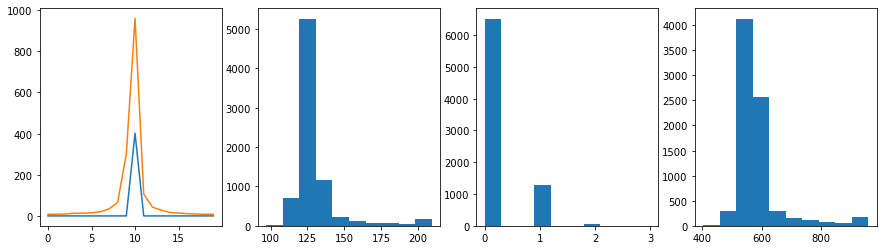

In [226]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
# plt.hist(abs(dct_1080bc_hst_com).mean(axis=1))
plt.plot(dct_1080bc_hst_com.min(axis=0))
plt.plot(dct_1080bc_hst_com.max(axis=0))
plt.subplot(1, 4, 2)
plt.hist(dct_1080bc_hst_com.std(axis=1))
plt.subplot(1, 4, 3)
plt.hist(abs(dct_1080bc_hst_com).min(axis=1))
plt.subplot(1, 4, 4)
plt.hist(abs(dct_1080bc_hst_com).max(axis=1))

(array([  13.,  128.,  527., 1342., 2075., 2251., 1170.,  286.,   54.,
           8.]),
 array([343. , 360.8, 378.6, 396.4, 414.2, 432. , 449.8, 467.6, 485.4,
        503.2, 521. ]),
 <a list of 10 Patch objects>)

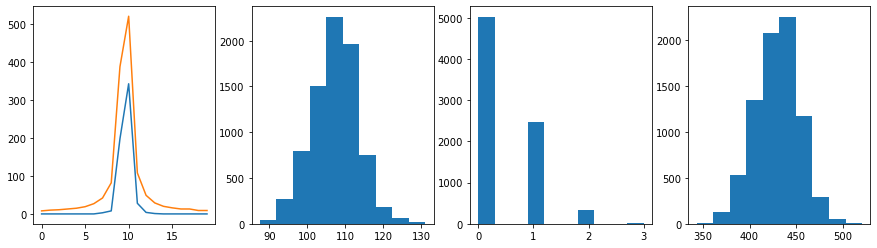

In [227]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
# plt.hist(abs(dct_720bc_hst_com).mean(axis=1))
plt.plot(dct_720bc_hst_com.min(axis=0))
plt.plot(dct_720bc_hst_com.max(axis=0))
plt.subplot(1, 4, 2)
plt.hist(dct_720bc_hst_com.std(axis=1))
plt.subplot(1, 4, 3)
plt.hist(abs(dct_720bc_hst_com).min(axis=1))
plt.subplot(1, 4, 4)
plt.hist(abs(dct_720bc_hst_com).max(axis=1))

### Corrected Calculation

In [239]:
print('4k')
dct_4k_dctt_com = dct_tile(img_4k, 32)
print('1080bc')
dct_1080bc_dctt_com = dct_tile(img_1080bc, 32)
print('720bc')
dct_720bc_dct_com = dct_tile(img_720bc, 32)

4k


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


1080bc
720bc


(array([2.000e+00, 0.000e+00, 3.000e+00, 6.000e+00, 1.100e+01, 4.200e+01,
        1.530e+02, 4.730e+02, 1.665e+03, 5.499e+03]),
 array([16.01579 , 16.41421 , 16.81263 , 17.211048, 17.609467, 18.007885,
        18.406305, 18.804724, 19.203142, 19.601562, 19.99998 ],
       dtype=float32),
 <a list of 10 Patch objects>)

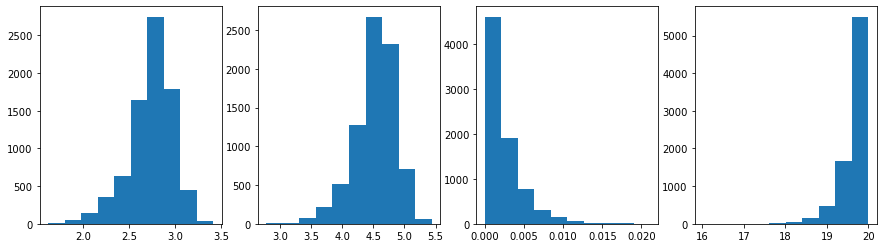

In [244]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.hist([abs(e).mean() for e in dct_4k_dctt_com])
plt.subplot(1, 4, 2)
plt.hist([e.std() for e in dct_4k_dctt_com])
plt.subplot(1, 4, 3)
plt.hist([abs(e).min() for e in dct_4k_dctt_com])
plt.subplot(1, 4, 4)
plt.hist([abs(e).max() for e in dct_4k_dctt_com])

(array([1.660e+02, 0.000e+00, 1.000e+00, 2.000e+00, 8.000e+00, 6.000e+00,
        2.200e+01, 9.000e+01, 8.130e+02, 6.746e+03]),
 array([ 1.       ,  2.8999934,  4.799987 ,  6.69998  ,  8.599974 ,
        10.499967 , 12.39996  , 14.299953 , 16.199947 , 18.09994  ,
        19.999933 ], dtype=float32),
 <a list of 10 Patch objects>)

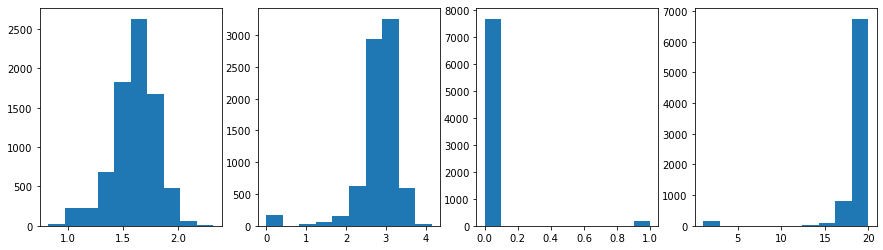

In [245]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.hist([abs(e).mean() for e in dct_1080bc_dctt_com])
plt.subplot(1, 4, 2)
plt.hist([e.std() for e in dct_1080bc_dctt_com])
plt.subplot(1, 4, 3)
plt.hist([abs(e).min() for e in dct_1080bc_dctt_com])
plt.subplot(1, 4, 4)
plt.hist([abs(e).max() for e in dct_1080bc_dctt_com])

(array([1.000e+00, 1.000e+00, 3.000e+00, 1.000e+01, 3.300e+01, 9.800e+01,
        2.420e+02, 6.280e+02, 1.822e+03, 5.016e+03]),
 array([12.966695, 13.670014, 14.373335, 15.076654, 15.779974, 16.483294,
        17.186613, 17.889935, 18.593254, 19.296574, 19.999893],
       dtype=float32),
 <a list of 10 Patch objects>)

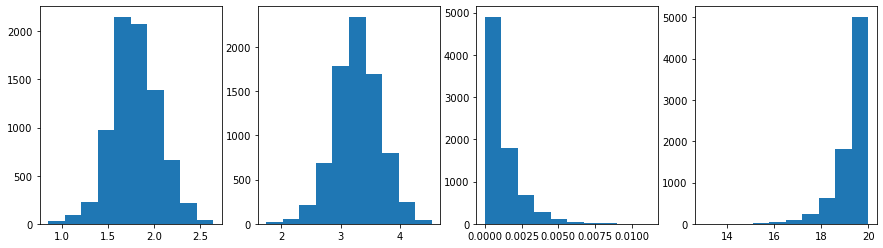

In [246]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.hist([abs(e).mean() for e in dct_720bc_dct_com])
plt.subplot(1, 4, 2)
plt.hist([e.std() for e in dct_720bc_dct_com])
plt.subplot(1, 4, 3)
plt.hist([abs(e).min() for e in dct_720bc_dct_com])
plt.subplot(1, 4, 4)
plt.hist([abs(e).max() for e in dct_720bc_dct_com])

### Randomized DCT

In [252]:
def self_ref_rand(img, tile, samples=20, channel=0, rate=2, threshold=20, bins=20):
    if len(img.shape) > 3:
        img = img[:, :, channel]
    xs = list(range(img.shape[0] // tile))
    ys = list(range(img.shape[1] // tile))
    np.random.shuffle(xs)
    np.random.shuffle(ys)
    idxs = list(zip(xs, ys))[:samples]
    dcts = []
    for i, j in idxs:
        dct = dct_tile(img[:, :], i, j, tile, rate=rate, threshold=threshold)
        dcts.append(dct)
    return np.array(dcts)

In [266]:
dct_4k_dct_rand = self_ref_rand(img_4k, 32)
dct_1080bc_dct_rand = self_ref_rand(img_1080bc, 32)
dct_720bc_dct_rand = self_ref_rand(img_720bc, 32)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


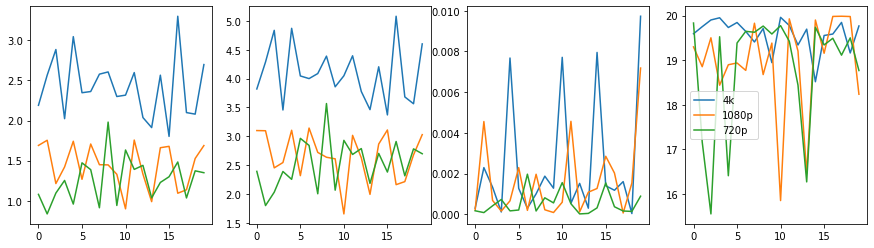

In [267]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.plot([abs(e).mean() for e in dct_4k_dct_rand], label='4k')
plt.plot([abs(e).mean() for e in dct_1080bc_dct_rand], label='1080p')
plt.plot([abs(e).mean() for e in dct_720bc_dct_rand], label='720p')
plt.subplot(1, 4, 2)
plt.plot([e.std() for e in dct_4k_dct_rand], label='4k')
plt.plot([e.std() for e in dct_1080bc_dct_rand], label='1080p')
plt.plot([e.std() for e in dct_720bc_dct_rand], label='720p')
plt.subplot(1, 4, 3)
plt.plot([abs(e).min() for e in dct_4k_dct_rand], label='4k')
plt.plot([abs(e).min() for e in dct_1080bc_dct_rand], label='1080p')
plt.plot([abs(e).min() for e in dct_720bc_dct_rand], label='720p')
plt.subplot(1, 4, 4)
plt.plot([abs(e).max() for e in dct_4k_dct_rand], label='4k')
plt.plot([abs(e).max() for e in dct_1080bc_dct_rand], label='1080p')
plt.plot([abs(e).max() for e in dct_720bc_dct_rand], label='720p')
plt.legend()

## Integreted

In [287]:
def dct_feature_extract(img, tile, channel=0, samples=50, ref_rate=2, theshold=20, div_dct=True):
    if len(img.shape) > 3:
        img = img[:, :, channel]
    
    xs = list(range(img.shape[0] // tile))
    ys = list(range(img.shape[1] // tile))
    np.random.shuffle(xs)
    np.random.shuffle(ys)
    idxs = list(zip(xs, ys))[:samples]
    
    abs_dev = lambda x: abs(x).mean()
    sqr_dev = lambda x: (x**2).mean()**0.5
    
    dcts = []
    abds = []
    stds = []
    for i, j in idxs:
        if div_dct:
            dct = dct_tile(img[:, :], i, j, tile, rate=ref_rate, threshold=None, divide_ref=div_dct).flatten()
            dct = dct[abs(dct) < threshold]
            abd = abs_dev(dct)
            std = sqr_dev(dct)
        else:
            dct, ref = dct_tile(img[:, :], i, j, tile, rate=ref_rate, threshold=None, divide_ref=div_dct)
            abd = abs_dev(dct) / abs_dev(ref)
            std = sqr_dev(dct) / sqr_dev(ref)
        dcts.append(dct)
        abds.append(abd)
        stds.append(std)
    return np.array([np.mean(abds), np.min(abds), np.max(abds),
                np.mean(stds), np.min(stds), np.max(stds)]),\
          np.array(dcts), np.array(abds), np.array(stds)

In [288]:
tmp, _, _, _ = dct_feature_extract(img_4k, 32, div_dct=False)
tmp

array([1.21423018, 0.81127465, 1.86197281, 1.00024067, 0.7879879 ,
       1.31093801])

In [289]:
tmp, _, _, _ = dct_feature_extract(img_1080bc, 32, div_dct=False)
tmp

array([1.04027796, 0.75368488, 1.7161895 , 1.00650995, 0.88981681,
       1.5589854 ])

In [290]:
tmp, _, _, _ = dct_feature_extract(img_720bc, 32, div_dct=False)
tmp

array([0.88074005, 0.68530542, 1.19057071, 0.99362287, 0.87677897,
       1.08038583])